### Learning about the creditcard data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd #pandas 
import numpy as np #numpy 

#reading the data
data = pd.read_csv("/content/drive/My Drive/creditcard.csv")
print(data.head())

   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


In [10]:
print(data.info())

#Features are transformed using pca for keeping the users data confidential 
#We have V1 to V28 which are principal component obtained from Credit Card Data using PCA
# Column Time and Amount are unchanged. Time is time between first and between transactions.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

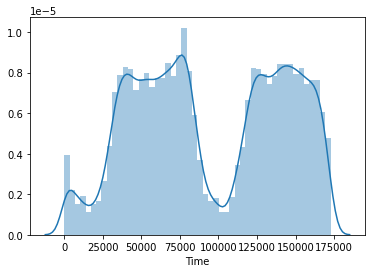

In [11]:
#importing module for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#time graph
sns.distplot(data['Time'], kde=True)
plt.show()


## Similarity checking between features

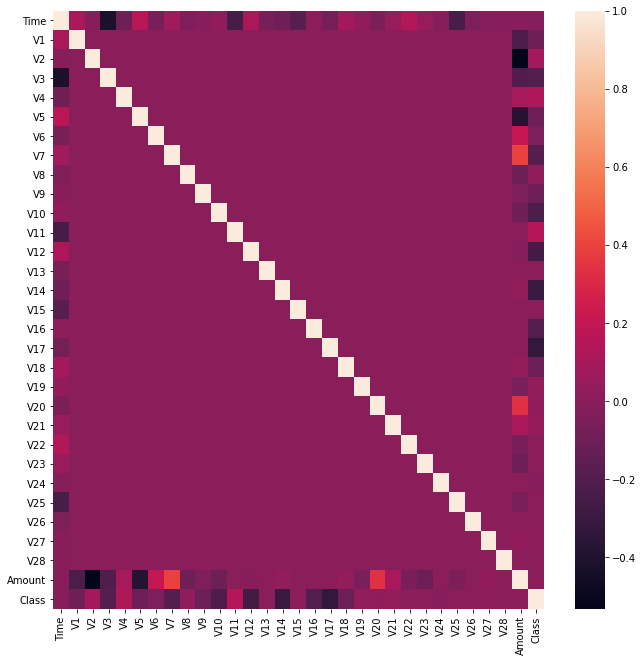

In [12]:
#similarity between the features
plt.figure(figsize=(11,11))

sns.heatmap(data.corr())
plt.show()

#finiding the similarites between the column as 1 being most similar and 0 being least similar
#We can remove one coloumn from 2 columns if they find similar
#but we will not remove any as they dont seems similar

## Balancing Classes in dataset

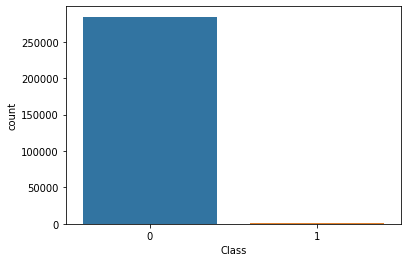

In [13]:
#class distribution of the type of credit card data
# 0 stands for right/Not Fraud card and 1 stands for fraud card
sns.countplot((data['Class']))

In [14]:
#Balancing the class distribution in the dataset 
df_Class0 = data[data.Class==0]
df_Class1 = data[data.Class==1]

df_Class0_reduced = df_Class0[0:492]
    
data = pd.concat([df_Class0_reduced,df_Class1])

print(data.shape)

(984, 31)


As we can see that data set is perfectly balanced.


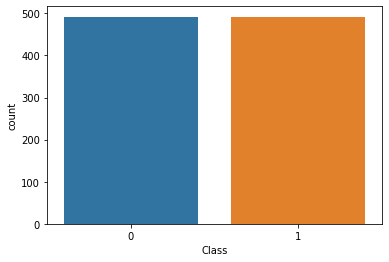

In [15]:
#count plot of balanced class dataset

sns.countplot((data['Class']))

print("As we can see that data set is perfectly balanced.")

## Train test split

In [16]:
#Seperating the features and labels from the data
X = data.drop('Class', axis=1)
y = data['Class']

In [17]:
#splitting the dataset using train test split
from sklearn.model_selection import train_test_split

#Seperating the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



In [18]:
Column_names = X_train.columns.tolist() #Names of the column

# Random Forest Classifier

In [19]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#fitting the data
clf.fit(X_train, y_train)

#predicting
y_pred = clf.predict(X_test)



## Feature importance using permutation importance

In [20]:
#permutation importance using scikit learn
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X, y, n_repeats=10, random_state=0)

print("feature importance value : ", result.importances_mean)

feature importance value :  [0.30101626 0.         0.         0.00050813 0.         0.
 0.         0.         0.         0.         0.0004065  0.
 0.00050813 0.         0.00050813 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.        ]


In [21]:
#accuracy of model
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred )

1.0

## Lime

In [22]:
pip install lime

     |████████████████████████████████| 276kB 2.7MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp36-none-any.whl size=283845 sha256=5aa2cd3dcb9c8128f43741ad3d38c36943945bfb2bdc0876175ba228dc8ec8a5
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [23]:
# importing Lime 
import lime
import lime.lime_tabular

#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["Not Fraud","Fraud"],
   
)



In [24]:
#We will use below rows for prediction explanations using lime and shap
row = [102, 105]


In [25]:
#Explanations using lime
for i in row:
  print("for row :",i," the real value is ", y_test.iloc[i])
  exp = lime_explainer.explain_instance(X_test.iloc[i], clf.predict_proba, num_features=5)
 
  exp.show_in_notebook(show_table=True)

#As we can see for row 102 the prediction is Fraud
#The Prediction done by the classifier is affected by some factors that are time, v13, v14, v10, v17
#These feature values as shown in the fig, tends to model to make this prediction

Output hidden; open in https://colab.research.google.com to view.

## Shap

In [26]:
pip install shap #installing shap

     |████████████████████████████████| 327kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.36.0-cp36-cp36m-linux_x86_64.whl size=456460 sha256=996bb024b55f6c6d5925520908babbcd5a05cdc44c510a5911064393663be81b
  Stored in directory: /root/.cache/pip/wheels/fb/15/e1/8f61106790da27e0765aaa6e664550ca2c50ea339099e799f4
Successfully built shap


In [27]:
#Importing shap module
import shap
 
#intialize JS visualization
shap.initjs()
 
#Shap tree explainer
shap_explainer = shap.TreeExplainer(model = clf, model_output='margin')
shap_values = shap_explainer.shap_values(X_test)


model_output = "margin" has been renamed to model_output = "raw"


for row : 102  the real value is  0


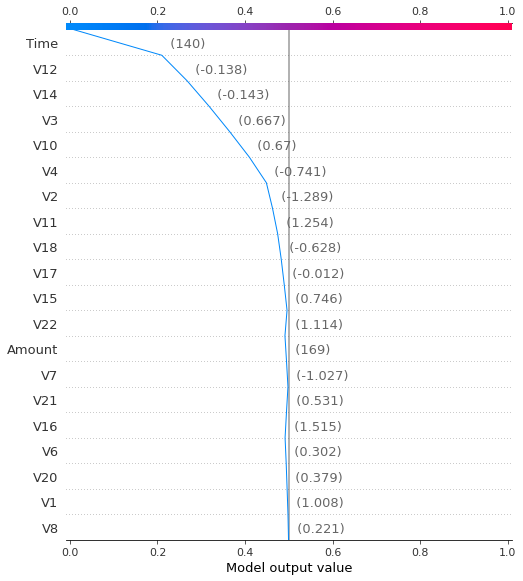

for row : 105  the real value is  0


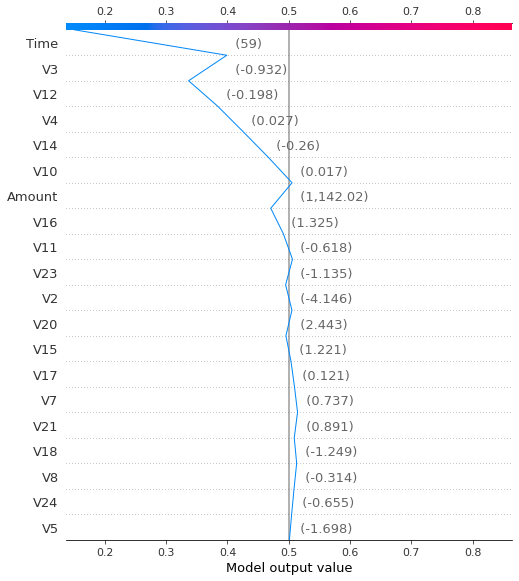

In [28]:
#Shap decision plot


for i in row:
  print("for row :",i," the real value is ", y_test.iloc[i])
  shap.decision_plot(
    base_value=shap_explainer.expected_value[1],
    shap_values=shap_values[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5
    )

#Below is the explanation of the model prediction done by the shap.
#As we can see the features such as time, v3, v14, v12, v11 directs the decision of the model

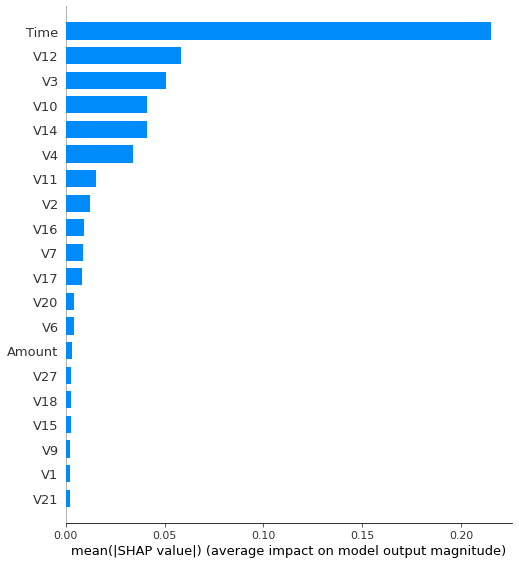

In [29]:
#bar chart
shap.summary_plot(shap_values = shap_values[1], features = X_test, max_display=20, plot_type='bar')


In [30]:
#summary plot of shap X_train
shap_values = shap_explainer.shap_values(X_train)

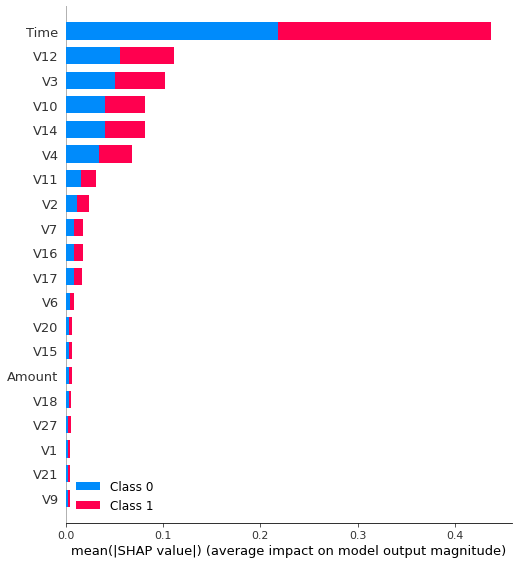

In [31]:
#shap summary plot of 
shap.summary_plot(shap_values, X_train, plot_type='bar')
 

# Logistic Regression

In [47]:
#Using logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
#classifier

lrClassifier = LogisticRegression()
lrClassifier.fit(X_train,y_train)
#predicting the test data
y_pred = lrClassifier.predict(X_test)


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## Model Coeffiecient

In [48]:
print("Model Coeffiecient : ", lrClassifier.coef_) #model coeffiecient

Model Coeffiecient :  [[ 0.00241475 -0.09681231 -0.73795398 -0.78177583  0.32739466 -0.14888204
  -0.35731308  0.58526301 -0.32980116  0.11091206 -0.47849313 -0.40525328
  -0.93598882  0.59540216  0.59559569 -0.12456781  0.17861141  0.48139527
   1.00194228  0.17956044  1.03645453  0.49069222  0.52186606  0.10711667
  -0.21390978 -0.68659393 -0.03132995 -0.30745442  0.03315185 -0.00653765]]


## Lime 

In [34]:

# Lime 
import lime
import lime.lime_tabular

#lime tabular explainer
lime_explainer_lr = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["Not Fraud","Fraud"],
    
)


In [35]:
#Explanations of the rows using lime 
for i in row:
  print("for row :",i," the real value is ", y_test.iloc[i])
  exp = lime_explainer_lr.explain_instance(X_test.iloc[i], lrClassifier.predict_proba, num_features=5)
 
  exp.show_in_notebook(show_table=True)
 
 


Output hidden; open in https://colab.research.google.com to view.

## Shap

In [36]:

#Shap tree explainer
explainer_shap_lr = shap.KernelExplainer(model = lrClassifier.predict_proba, data= X_train, model_output='margin')
shap_values_testlr = explainer_shap_lr.shap_values(X_test, nsamples= 787, l1_reg="num_features(4)")



Using 787 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


for row : 102  the real value is  0


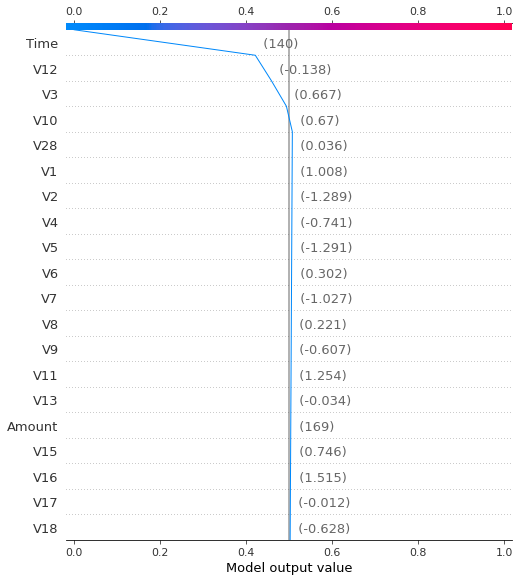

for row : 105  the real value is  0


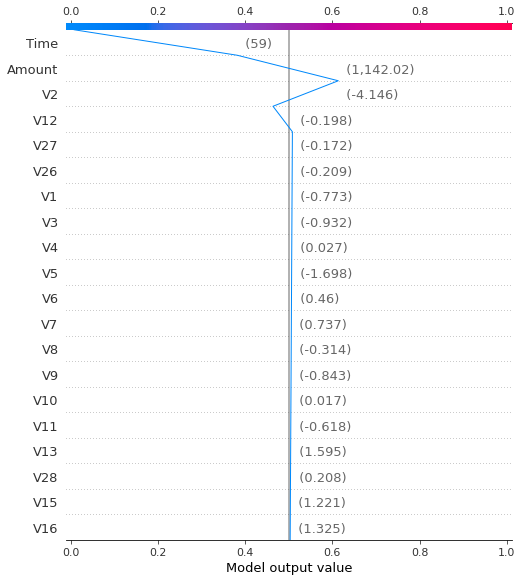

In [37]:

for i in row:
  print("for row :",i," the real value is ", y_test.iloc[i])
  shap.decision_plot(
    base_value = explainer_shap_lr.expected_value[1],
    shap_values=shap_values_testlr[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
    link="identity",
    new_base_value=0.5,
  )

#Below is the explanation of the model prediction done by the shap.

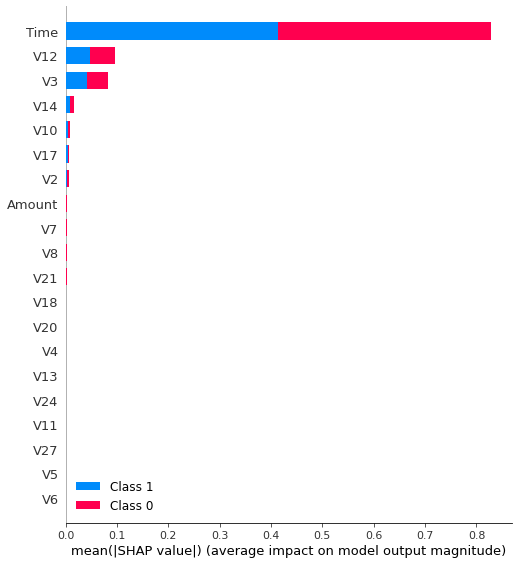

In [38]:
#summary plot
shap.summary_plot(shap_values = shap_values_testlr, features = X_test, max_display=20, plot_type='bar')


# Decision Tree Classifier

In [39]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=45)

clf.fit(X_train, y_train)

#predicting the test data
y_pred = clf.predict(X_test)


## Feature importance

In [40]:
print("Feature importance : ",clf.feature_importances_) #Feature importance

Feature importance :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


## Lime Black Box model interpretation

In [41]:
#importing Lime 
import lime
import lime.lime_tabular

#using tabuar explainer of lime
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
   X_train.values,
    training_labels=y_train.values,
    feature_names=X_train.columns.tolist(),
    feature_selection="auto",
    class_names  = ["Not Fraud","Fraud"],
  
)



In [42]:
for i in row:
  print("for row :",i," the real value is ", y_test.iloc[i])
  exp = lime_explainer.explain_instance(X_test.iloc[i], clf.predict_proba, num_features=5)
 
  exp.show_in_notebook(show_table=True)
 

Output hidden; open in https://colab.research.google.com to view.

## Shap

In [43]:
#Importing shap module
import shap
 
#intialize JS visualization
shap.initjs()

In [44]:

#Shap tree explainer
explainer_decTree = shap.TreeExplainer(clf, data=X_train)
shap_values_testdecTree = explainer_decTree.shap_values(X_test)



for row : 102  the real value is  0


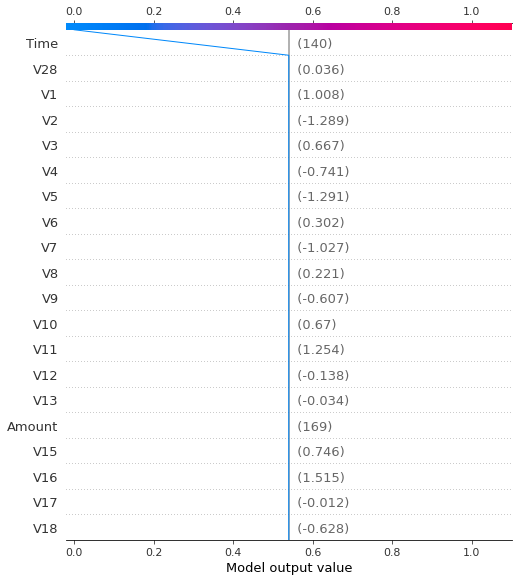

for row : 105  the real value is  0


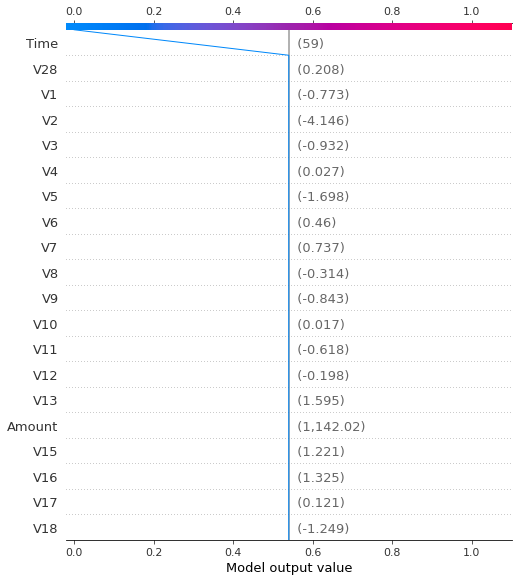

In [45]:

for i in row:
  print("for row :",i," the real value is ", y_test.iloc[i])
  shap.decision_plot(
    base_value=explainer_decTree.expected_value[1],
    shap_values=shap_values_testdecTree[1][i],
    features=X_test.iloc[i],
    feature_names=X_test.columns.tolist(),
   )

#Below is the explanation of the model prediction done by the shap.

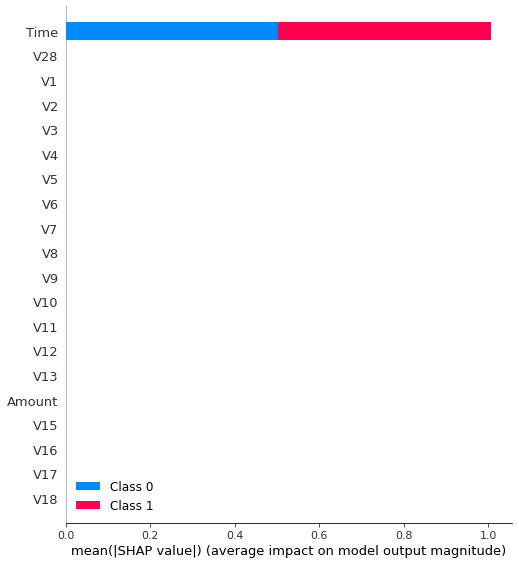

In [46]:
#bar chart for feautres effecting the prediction by model
shap.summary_plot(shap_values = shap_values_testdecTree, features = X_test, max_display=20, plot_type='bar')
 